# Geographic Mapping with Cartopy
In this tutorial we'll finally get into displaying some geographic information. We'll make use of an atmospheric dataset from the Iowa Environmental Mesonet's archive of ASOS data. I'm sure in your own work there are a variety of datasets that have a lat/lon component that you would love to display.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy
import cartopy.crs as ccrs

Let's get our data read in with Pandas. If you visit the IEM ASOS download link provided in the resources section and look around you'll notice that missing values are denoted by M. We can deal with those missing values immediately as we read in the data using the na_values argument in pandas read_csv function.

In [2]:
data = pd.read_csv('./data/asos.txt', sep=',', na_values='M')
data

,station,valid,lon,lat,tmpf,tmpc,dwpf,dwpc,relh,drct,sped,mslp
0,GSH,2020-01-01 00:00,-85.7922,41.5272,NaN,NaN,NaN,NaN,NaN,260.0,19.55,NaN
1,HNB,2020-01-01 00:00,-86.9500,38.2500,NaN,NaN,NaN,NaN,NaN,290.0,5.75,NaN
2,GEZ,2020-01-01 00:00,-85.8048,39.5831,NaN,NaN,NaN,NaN,NaN,250.0,12.65,NaN
3,OKK,2020-01-01 00:00,-86.0590,40.5282,NaN,NaN,NaN,NaN,NaN,250.0,17.25,NaN
4,HUF,2020-01-01 00:00,-87.3076,39.4515,NaN,NaN,NaN,NaN,NaN,260.0,11.50,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
113010,FWA,2020-01-30 23:55,-85.1871,40.9781,NaN,NaN,NaN,NaN,NaN,110.0,4.60,NaN
113011,HNB,2020-01-30 23:56,-86.9500,38.2500,37.9,3.28,30.0,-1.11,72.93,20.0,3.45,1022.5
113012,OKK,2020-01-30 23:56,-86.0590,40.5282,32.0,0.00,28.0,-2.22,84.98,70.0,3.45,1024.2
113013,GUS,2020-01-30 23:56,-86.1521,40.6481,32.0,0.00,30.2,-1.00,92.97,100.0,3.45,1023.9


Let's look our data over, we've got the following . . .
 - A station identifier code
 - A time when the observation is valid
 - A longitude value (negative)
 - A latitude value
 - Temperature and dewpoint temperature in both fahrenheit and celcius
 - Relative humidity as a percentage
 - Wind direction in degrees
 - Wind speed in miles per hour
 - Mean sea level pressure in millibars
 
Just looking at the data, some of this isn't going to be super obvious which is why I've spelled it out here. If you spend some time looking over the data download page, you likely could figure this all out for the most part. I'd encourage you to try downloading your own dataset and creating some of your own figures using what you learn here afterwards.

In order to map out our data, we're going to need a coordinate reference system or CRS. The CRS is a way of defining locations on the earth using an approximate model of the Earth called a datum (typically ellipsoidal or spherical). The most common datums are WGS84 or NAD83. You're likely familiar with this already as measurements for a CRS are typically in degrees of longitude or latitude (i.e. our dataset above). 

This is all fine and well but we have to get this data onto a flat surface, to do this we're going to need to project this representation of our 3D world onto a flat surface. This is where a projection comes in. A coordinate reference system and projection are related but different concepts. Check out the Esri link in the resources section of this tutorial and spend some time mulling this over. If you haven't had opportunity to take a GIS course (be it ArcGIS or Programming based GIS), I highly recommend finding room for it in your curriculum at some point. You will learn a ton about geo-spatial data analytics this way. If you don't have the time or are incapable of taking a class, there are tons of great online resources from Esri, the QGIS folks, various Youtubers, and many other sources across the internet.

Back on topic, you will always have a CRS. Or at least you should have a CRS. If you don't have one you'll need to take a guess at what it is supposed to be. Typically you can make a pretty good informed guess. If you're wrong, it typically is pretty obvious as points won't show up where you expect them to.

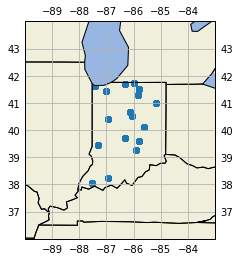

In [3]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
plt.scatter(data['lon'], data['lat'])

ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.STATES)

ax.set_extent([-90, -83, 36, 44])

Just like that, we've got a pretty sweet looking map! Granted, there isn't any information about the data points other than "This is where our stations are!" but it

It is somewhat confusing that Plate Caree (WGS84) is listed as both the projection and the crs when WGS84 is supposed to just refer to the CRS. What is happening here is that Cartopy has defined Plate Caree to use the WGS84 CRS. Plate Carree in actuality is an equirectangular projection.

So that first plot was kind of a scatter shot of different commands from cartopy. Let's step through these commands and then we'll try to make the map a little more useful.

#### 1. ax = plt.axes(projection=ccrs.PlateCarree())
#### 2. ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
#### 3. plt.scatter(data['lon'], data['lat'])
Let's deal with these first three lines first. The first line establishes our geographic axes while the second line adds the gridlines themselves to the map. You might be wondering why we specify the projection and then specify the CRS on the second line. We don't have to do this, the plt.axes command has established this already but for the sake of clarity we typically will specify it in the ax.gridlines call. You'll find that if you remove the crs from ax.gridlines nothing will change in the map.

The final command for this section is plt.scatter. This is telling Python that we want a scatter plot and we're providing the x and y values.

#### 4. ax.add_feature(cartopy.feature.FEATURE_2_ADD)
#### 5. ax.set_extent([Longitude Left, Longitude Right, Latitude Bottom, Latitude Top])
Command 4 adds some extra features to our map that don't require much work on our part aside from naming the features we're after. This is how we got the great lakes, land, and state boundaries added into our map for next to no work at all. Some of these aren't really doing much in our current figure but I've left them in to show some of the features available.

Command 5 will allow us to set the boundaries of our map with ease. I've included in the snippet above which argument goes where since the ordering of these arguments can be different from program to program.

### Let's try to do a little more with our map.
Our map as it stands right now isn't particularly useful. Let's try to add some contours to it!

TypeError: Input z must be 2D, not 1D

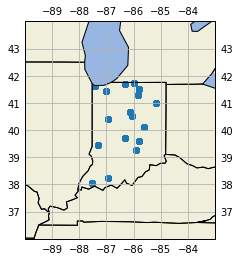

In [4]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
plt.scatter(data['lon'], data['lat'])

ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.STATES)

ax.set_extent([-90, -83, 36, 44])
ax.contourf(data['lon'], data['lat'], data['sped'],
                transform=ccrs.PlateCarree(),
                cmap='nipy_spectral')

Wait, what gives? Why didn't the above work? Good question! I really wasn't expecting this to fail either which is why I've left it in this tutorial. Sometimes things don't work like we might expect and we've got to hunt down a solution. Fortunately, Google makes this sort of thing super easy to sort out. This is what I searched: "contourf cartopy TypeError: Input z must be 2D, not 1D". The first link led me to stackoverflow where I was able to get an answer very quickly. (Here's the link just in case: https://stackoverflow.com/questions/34113083/numpy-contour-typeerror-input-z-must-be-a-2d-array")

To get this to work, we need to create all possible combinations of our longitude latitude pairs (this is called a meshgrid).

In [ ]:
np.meshgrid(data['lon'], data['lat'])

Now we have a second problem, one that I should have foreseen. Our dataframe includes data for many days, not just a single day. This means that there are many repeated latitude/longitude values. We'll need to grab the unique values and when we plot, we'll have to choose just one day.

In [ ]:
sub = data.loc[data.valid == '2020-01-10 15:00',]
sub

In [ ]:
x,y = np.meshgrid(sub['lon'].unique(), sub['lat'].unique())

In [ ]:
z = sub.pivot('lon', 'lat', 'sped').values
sub.pivot('lon', 'lat', 'sped')

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.STATES)

ax.set_extent([-88, -85, 38, 42])

plt.tricontourf(data['lon'],data['lat'],data['sped'])
plt.scatter(data['lon'], data['lat'])

The function we used for contouring is called tricontourf, the documentation can be found here: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.tricontourf.html

This function is intended to draw contours on an unstructured grid (which is what we have here, irregularly spaced points). This is an implementation of Delaunay trinagulation (a sort of nearest neighbor region interpolation). If you'd like to take this exercise a step further, try interpolating your data onto a regular grid and then contouring the data with matplotlib's contour or contourf function. The results will be a lot smoother.